#Ingresos

https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datos2 = pd.read_excel('dftotal_20_completa.xlsx')

In [ ]:
datos=datos2.fillna(value=0)

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
3477,701_hospDom,701_1hospDom,0.999958,0.999958
3999,701_1hospDom,701_hospDom,0.999958,0.999958
3299,701_hospDia,701_1hospDia,0.999486,0.999486
3821,701_1hospDia,701_hospDia,0.999486,0.999486
3732,701_1CMA,701_CMA,0.998393,0.998393


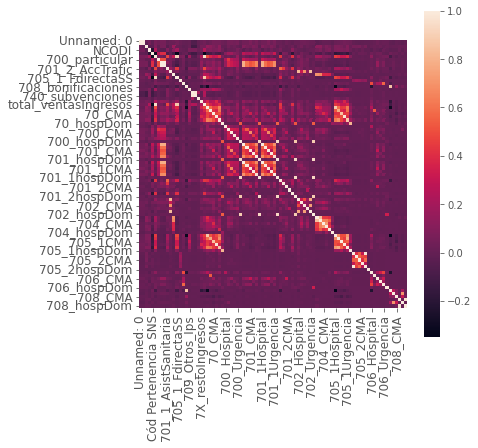

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 12)

In [ ]:
datos

,Unnamed: 0,año,comunidad,cod_comunidad,NCODI,Cód Pertenencia SNS,70_tIngresos,700_particular,701_AsegPriv,701_1_AsistSanitaria,...,706_CMA,706_hospDia,706_Urgencia,706_hospDom,708_Hospital,708_consulExter,708_CMA,708_hospDia,708_Urgencia,708_hospDom
0,0,2010,CATALUÑA,9,975,1,4728799,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010,CATALUÑA,9,960,1,9232021,53901,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2010,CATALUÑA,9,1027,1,7011809,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2010,CATALUÑA,9,1028,1,642533,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2010,CATALUÑA,9,976,1,31501404,703197,539048,539048,...,0,30171,667,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,7674,2019,LA RIOJA-CEUTA-MELILLA,14,1083,1,1215633,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7675,7675,2019,LA RIOJA-CEUTA-MELILLA,14,1096,1,3828988,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7676,7676,2019,LA RIOJA-CEUTA-MELILLA,14,1159,2,1362156,290451,1071705,1071705,...,0,0,0,0,0,0,0,0,0,0
7677,7677,2019,LA RIOJA-CEUTA-MELILLA,14,1047,1,83553525,10610346,6750067,5905972,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del(datos["Unnamed: 0"])

In [ ]:
del(datos["NCODI"])

In [ ]:
del(datos["comunidad"])

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns='70_tIngresos')
y = datos['70_tIngresos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

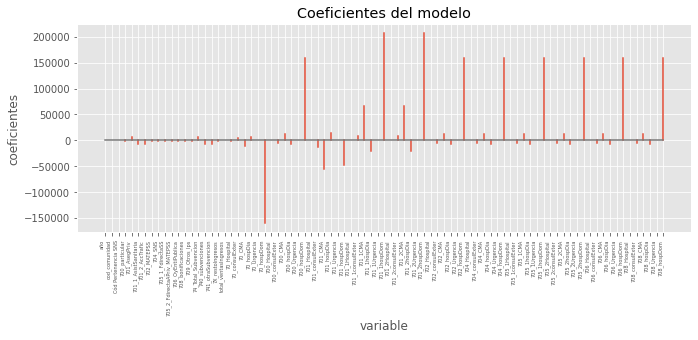

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([1.72605225e+07, 2.63990760e+08, 3.66107470e+07, 5.14917047e+06,
       1.05699229e+07, 7.27828679e+06, 1.57601931e+06, 1.36094042e+07,
       3.21638211e+06, 6.91097166e+07])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 3.0353697433701194


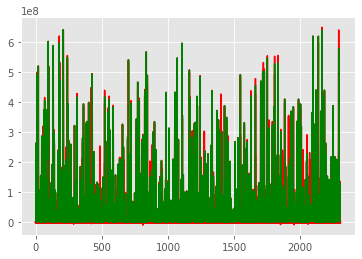

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(X_test.shape[0]))
plt.plot(xx, X_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, predicciones, c='g', label='prediction')
plt.axis('tight')
#plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                             #                   weights))

plt.show()

Las predicciones del modelo final se alejan en promedio 3.035 unidades del valor real.

Ridge

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

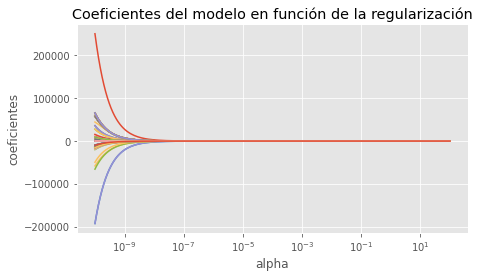

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce

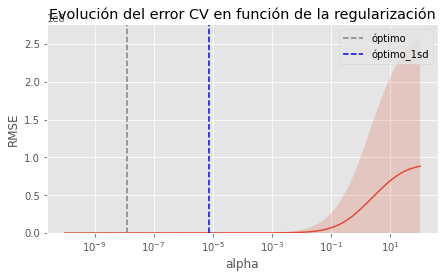

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1.289890261253308e-08


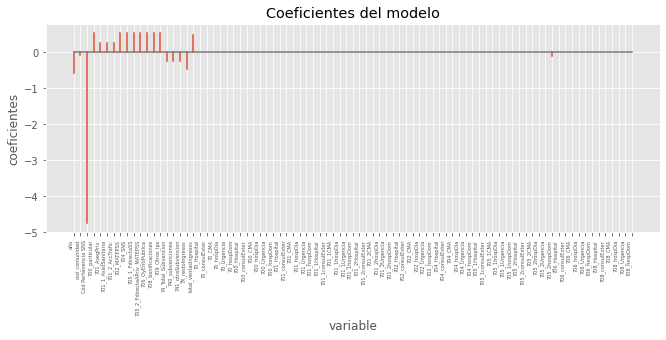

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

En comparación al modelo por mínimos cuadrados ordinarios, con ridge, el orden de magnitud de los coeficientes es mucho menor.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([1.72605303e+07, 2.63990754e+08, 3.66107237e+07, 5.14918000e+06,
       1.05699257e+07, 7.27829848e+06, 1.57603949e+06, 1.36094211e+07,
       3.21640839e+06, 6.91097138e+07])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 42.95960825941625


Lasso

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

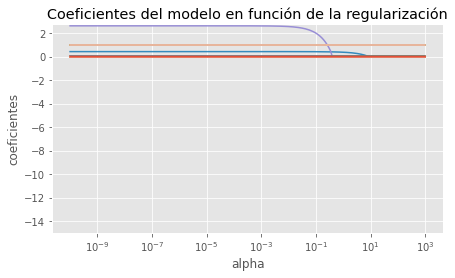

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

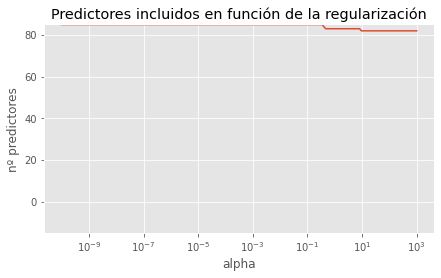

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

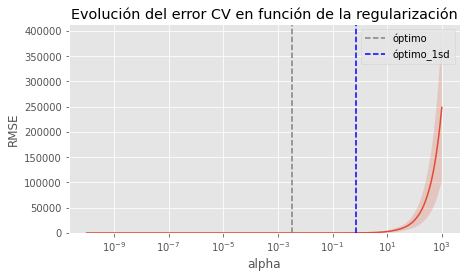

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.0032550885998350633


In [ ]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.73168071]


In [ ]:
# se entrena de nuevo el modelo
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([0.73168071]), normalize=True)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
2,Cód Pertenencia SNS,-1267.517813
3,700_particular,0.977949
4,701_AsegPriv,0.976974
5,701_1_AsistSanitaria,0.000090
7,702_MATEPSS,0.975594
...,...,...
80,708_consulExter,-0.004338
81,708_CMA,0.020512
82,708_hospDia,0.067423
83,708_Urgencia,-0.012723


De los 84 predictores, el modelo se queda con 80

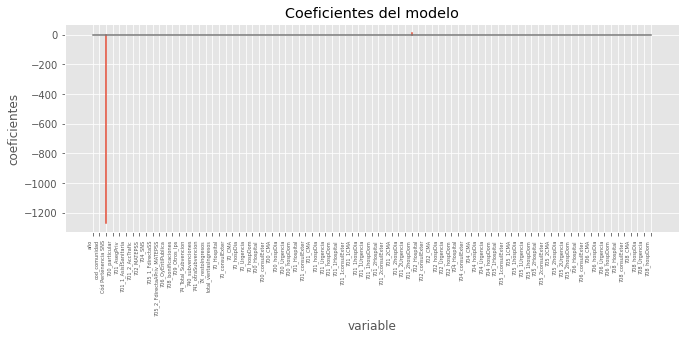

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([1.72565507e+07, 2.63955936e+08, 3.66074132e+07, 5.16783252e+06,
       1.05722196e+07, 7.24744098e+06, 1.57606812e+06, 1.36075286e+07,
       3.21784840e+06, 6.91004843e+07])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 38891.39014645392


Elastic Net

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1399,0.99,1.000000e-10,3.209863e+06,1.791609e+03
1398,0.99,1.162322e-10,3.236065e+06,1.798907e+03
1397,0.99,1.350994e-10,3.262607e+06,1.806269e+03
1396,0.99,1.570290e-10,3.289501e+06,1.813698e+03
1395,0.99,1.825183e-10,3.316756e+06,1.821196e+03
...,...,...,...,...
2,0.00,7.401960e+02,8.437424e+15,9.185545e+07
201,0.10,8.603464e+02,8.437424e+15,9.185545e+07
1,0.00,8.603464e+02,8.437426e+15,9.185546e+07
200,0.10,1.000000e+03,8.437427e+15,9.185547e+07


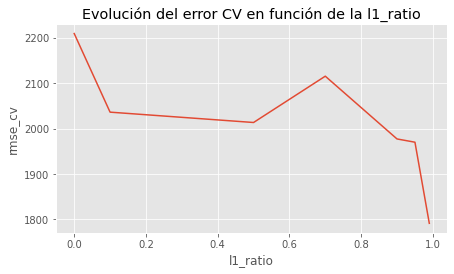

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 1e-10
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

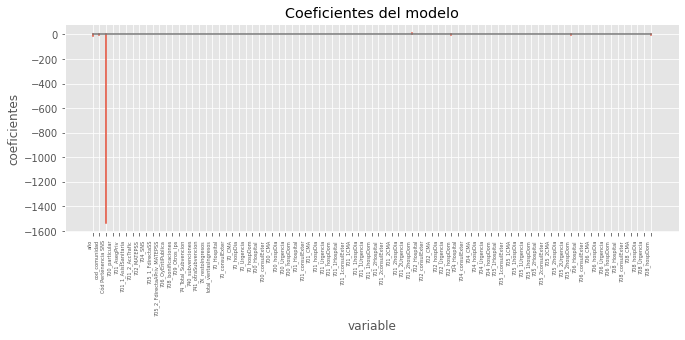

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 39802.530437850706


Comparación
Se compara el error de test (rmse) de los 4 modelos

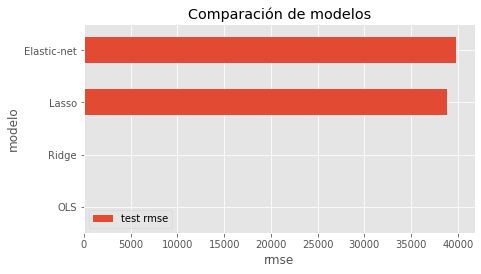

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(f_test['total_cases'].shape[0]))
plt.plot(xx, f_test['total_cases'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

#Gastos

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datos2 = pd.read_excel('dftotal_19_completa.xlsx')

In [ ]:
datos=datos2.fillna(value=0)

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
441,640_sueldos,64_gastoPersonal,0.999584,0.999584
417,64_gastoPersonal,640_sueldos,0.999584,0.999584
1,Unnamed: 0,año,0.994977,0.994977
25,año,Unnamed: 0,0.994977,0.994977
491,642_SegSocEmpresa,64_gastoPersonal,0.993008,0.993008


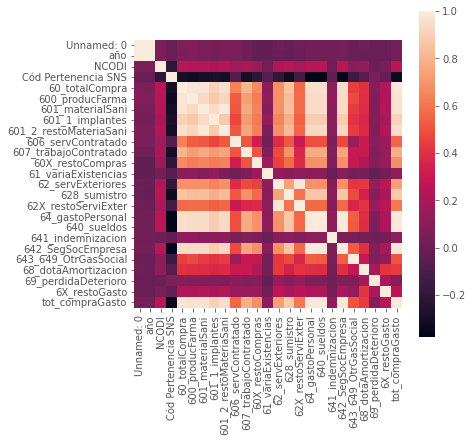

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 10)

In [ ]:
datos

,Unnamed: 0,año,Desc CCAA (Todas),NCODI,Cód Pertenencia SNS,60_totalCompra,600_producFarma,601_materialSani,601_1_implantes,601_2_restoMateriaSani,...,62X_restoServiExter,64_gastoPersonal,640_sueldos,641_indemnizacion,642_SegSocEmpresa,643_649_OtrGasSocial,68_dotaAmortizacion,69_perdidaDeterioro,6X_restoGasto,tot_compraGasto
0,0,2010,CATALUÑA,975,1,1342696,91951,64076,0,64076,...,432635,2632412,2084003,0,542500,5909,49685,0,91,4577361
1,1,2010,CATALUÑA,960,1,1451149,139972,158823,0,158823,...,398519,6131581,4806953,0,1307187,17441,557422,265,230327,9023447
2,2,2010,CATALUÑA,1027,1,468292,52750,52750,0,52750,...,1635049,3975339,3210811,0,764528,0,198508,0,0,6544043
3,3,2010,CATALUÑA,1028,1,92625,2456,1764,0,1764,...,79067,280070,212450,448,65366,1806,13709,0,45621,530613
4,4,2010,CATALUÑA,976,1,5521482,650052,652307,0,652307,...,1586006,24085520,19005887,0,5008683,70950,529526,16060,18235,32540208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,7674,2019,LA RIOJA-CEUTA-MELILLA,1083,1,190822,14681,9054,0,9054,...,218567,551021,437303,0,113718,0,23820,0,30330,1031240
7675,7675,2019,LA RIOJA-CEUTA-MELILLA,1096,1,999378,237549,161720,0,161720,...,259377,1672078,1311913,0,357118,3047,558,0,307042,3393447
7676,7676,2019,LA RIOJA-CEUTA-MELILLA,1159,2,319325,0,140599,0,140599,...,798044,73356,52061,0,20601,694,27836,0,5679,1254942
7677,7677,2019,LA RIOJA-CEUTA-MELILLA,1047,1,23405134,8843044,7157001,1047184,6109817,...,4701447,51108729,41081711,4105,9929759,93154,2503475,0,1433,83553525


In [ ]:
del(datos["Unnamed: 0"])

In [ ]:
del(datos["NCODI"])

In [ ]:
del(datos["Desc CCAA (Todas)"])

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns='60_totalCompra')
y = datos['60_totalCompra']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

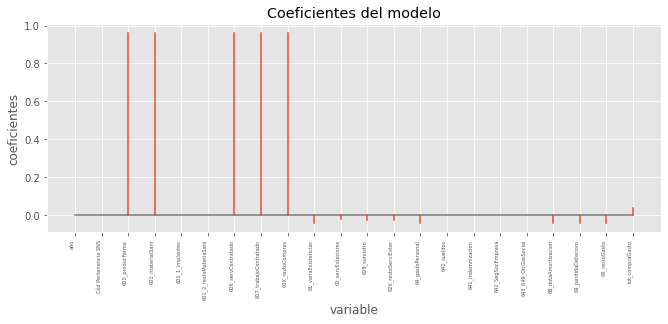

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 6664387.00000002, 82537789.99999994, 11238163.00000001,
        1047298.00000001,  6605605.00000001,  2504766.99999999,
         163725.00000001,  2940630.00000002,  2871508.        ,
       18309532.99999997])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 2.2833206233113707e-08


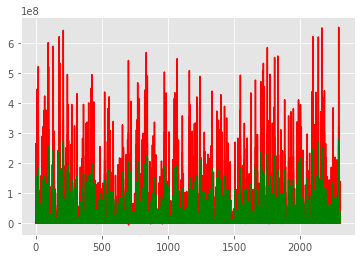

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(X_test.shape[0]))
plt.plot(xx, X_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, predicciones, c='g', label='prediction')
plt.axis('tight')
#plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                             #                   weights))

plt.show()

Las predicciones del modelo final se alejan en promedio 3.035 unidades del valor real.

Ridge

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

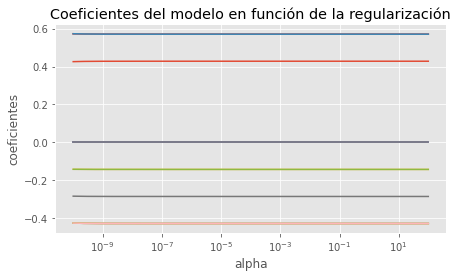

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

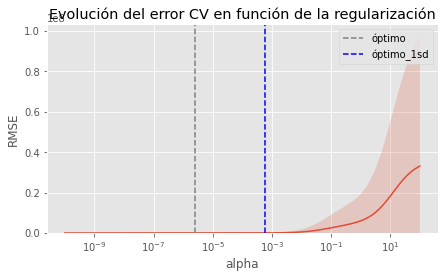

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 2.523539170434766e-06


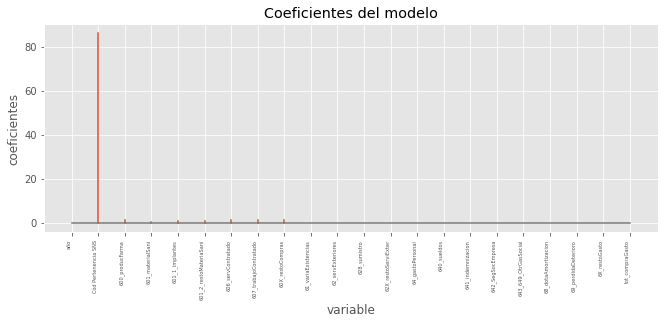

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

En comparación al modelo por mínimos cuadrados ordinarios, con ridge, el orden de magnitud de los coeficientes es mucho menor.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 6664325.83059476, 82538017.798191  , 11238185.47645729,
        1047313.74599025,  6605620.20055465,  2504651.99793617,
         163630.3555489 ,  2940548.69425599,  2871405.21065004,
       18309418.22059253])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 184.52185594673438


Lasso

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

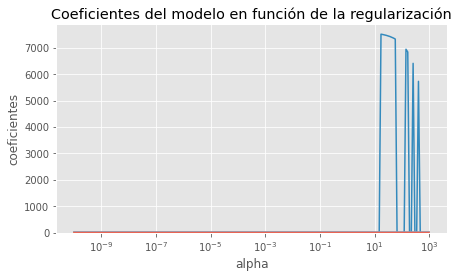

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

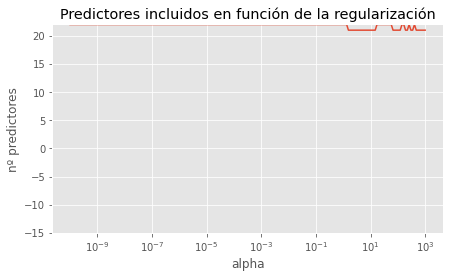

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

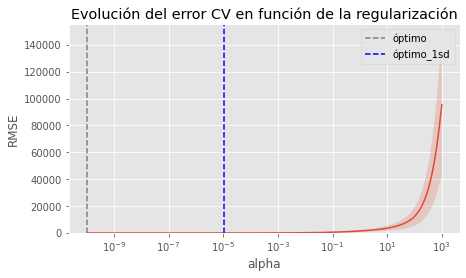

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [ ]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [1.07189132e-05]


In [ ]:
# se entrena de nuevo el modelo
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([1.07189132e-05]), normalize=True)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,año,571.267084
1,Cód Pertenencia SNS,3261.318974
2,600_producFarma,1.064605
3,601_materialSani,1.063771
4,601_1_implantes,-0.000556
5,601_2_restoMateriaSani,0.000415
6,606_servContratado,1.063540
7,607_trabajoContratado,1.063534
8,60X_restoCompras,1.063182
9,61_variaExistencias,0.063668


De los 84 predictores, el modelo se queda con 80

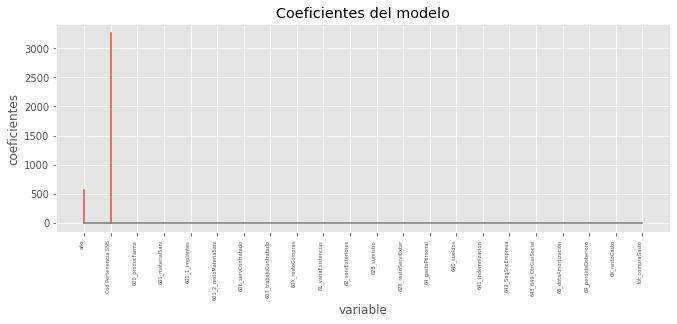

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 6661530.11613356, 82622939.19125248, 11238229.25565125,
        1050405.98604493,  6603735.63115396,  2501753.73453253,
         165259.82451633,  2942579.44950378,  2867796.26261954,
       18321420.06983025])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 18143.16675559114


Elastic Net

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1399,0.99,1.000000e-10,1.780830e+07,4.219988e+03
1398,0.99,1.162322e-10,1.784221e+07,4.224004e+03
1397,0.99,1.350994e-10,1.787888e+07,4.228343e+03
1396,0.99,1.570290e-10,1.791869e+07,4.233048e+03
1395,0.99,1.825183e-10,1.796206e+07,4.238167e+03
...,...,...,...,...
2,0.00,7.401960e+02,1.352295e+15,3.677356e+07
201,0.10,8.603464e+02,1.352295e+15,3.677356e+07
1,0.00,8.603464e+02,1.352296e+15,3.677358e+07
200,0.10,1.000000e+03,1.352296e+15,3.677358e+07


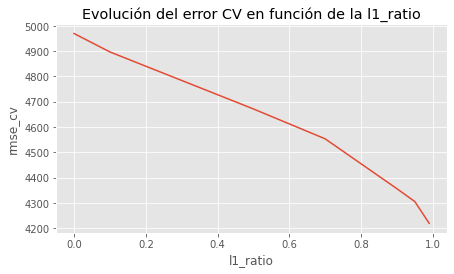

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 1e-10
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

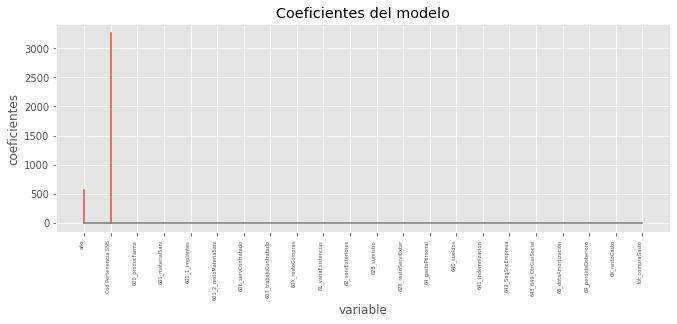

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 18143.10617349913


Comparación
Se compara el error de test (rmse) de los 4 modelos

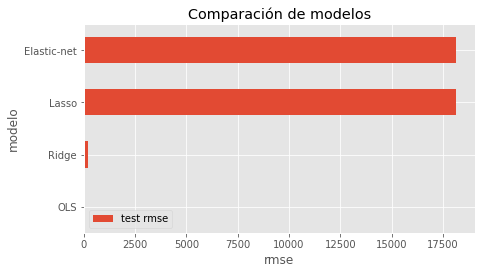

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

# Máquinas de Vector Soporte (Vector Support Machines, SVMs)
GASTOS

Seleccionamos las características del modelo con las que vamos a trabajar

In [ ]:
datos

,año,Cód Pertenencia SNS,60_totalCompra,600_producFarma,601_materialSani,601_1_implantes,601_2_restoMateriaSani,606_servContratado,607_trabajoContratado,60X_restoCompras,...,62X_restoServiExter,64_gastoPersonal,640_sueldos,641_indemnizacion,642_SegSocEmpresa,643_649_OtrGasSocial,68_dotaAmortizacion,69_perdidaDeterioro,6X_restoGasto,tot_compraGasto
0,2010,1,1342696,91951,64076,0,64076,13431,1066875,106363,...,432635,2632412,2084003,0,542500,5909,49685,0,91,4577361
1,2010,1,1451149,139972,158823,0,158823,26564,976953,148837,...,398519,6131581,4806953,0,1307187,17441,557422,265,230327,9023447
2,2010,1,468292,52750,52750,0,52750,1785,0,361007,...,1635049,3975339,3210811,0,764528,0,198508,0,0,6544043
3,2010,1,92625,2456,1764,0,1764,5268,77033,6104,...,79067,280070,212450,448,65366,1806,13709,0,45621,530613
4,2010,1,5521482,650052,652307,0,652307,1228174,2738887,252062,...,1586006,24085520,19005887,0,5008683,70950,529526,16060,18235,32540208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,2019,1,190822,14681,9054,0,9054,648,156008,10431,...,218567,551021,437303,0,113718,0,23820,0,30330,1031240
7675,2019,1,999378,237549,161720,0,161720,46697,540308,13104,...,259377,1672078,1311913,0,357118,3047,558,0,307042,3393447
7676,2019,2,319325,0,140599,0,140599,0,178726,0,...,798044,73356,52061,0,20601,694,27836,0,5679,1254942
7677,2019,1,23405134,8843044,7157001,1047184,6109817,5545795,599098,1260196,...,4701447,51108729,41081711,4105,9929759,93154,2503475,0,1433,83553525


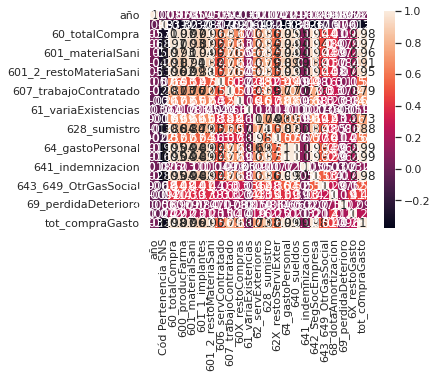

In [ ]:
import seaborn as sns

sns.set()
sns.heatmap(datos.corr(), square=True, annot=True)

In [ ]:
df=datos[['60_totalCompra',"600_producFarma","601_materialSani","601_1_implantes","64_gastoPersonal","640_sueldos","642_SegSocEmpresa","tot_compraGasto"]]

Aquí poner X e y del caso anterior

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     -601519       0.00      0.00      0.00         1
     -541062       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
        3854       0.33      1.00      0.50         1
        4509       0.00      0.00      0.00         0
        4860       0.00      0.00      0.00         0
       11919       0.00      0.00      0.00         0
       14747       0.00      0.00      0.00         1
       15269       0.00      0.00      0.00         1
       18451       0.00      0.00      0.00         1
       19062       0.00      0.00      0.00         0
       20282       0.00      0.00      0.00         0
       24025       0.00      0.00      0.00         1
       24787       0.00      0.00      0.00         1
       26327       0.00      0.00      0.00         1
       26962   

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

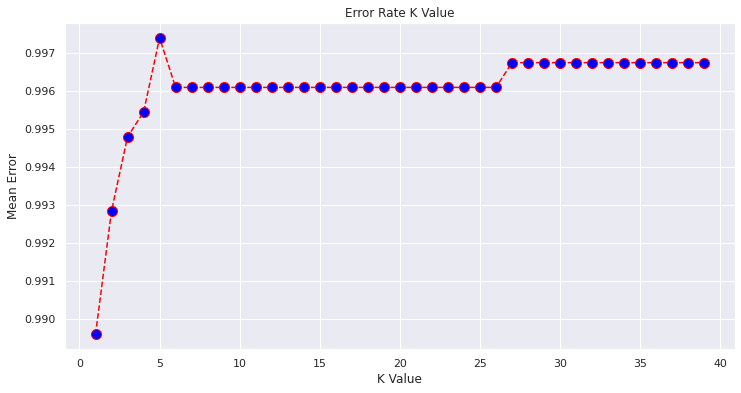

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

El valor de K=0.5 es el que menor error arroja

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     -601519       0.00      0.00      0.00         1
     -541062       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
        3854       1.00      1.00      1.00         1
       14747       0.00      0.00      0.00         1
       15269       0.00      0.00      0.00         1
       17545       0.00      0.00      0.00         0
       18451       0.00      0.00      0.00         1
       24025       0.00      0.00      0.00         1
       24787       0.00      0.00      0.00         1
       26327       0.00      0.00      0.00         1
       27531       0.00      0.00      0.00         0
       27562       0.00      0.00      0.00         1
       28356       0.00      0.00      0.00         0
       28451       0.00      0.00      0.00         0
       28854   

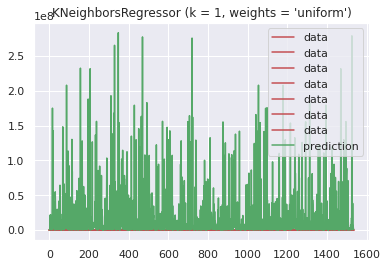

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(X_test.shape[0]))
plt.plot(xx, X_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

# Building an Ensemble Learning Model Using Scikit-learn ingresos

In [ ]:
import pandas as pd
#read in the dataset
df2 = pd.read_excel('dftotal_20_completa.xlsx')
df=df2.fillna(value=0)
#take a look at the data
df.head()

,Unnamed: 0,año,comunidad,cod_comunidad,NCODI,Cód Pertenencia SNS,70_tIngresos,700_particular,701_AsegPriv,701_1_AsistSanitaria,...,706_CMA,706_hospDia,706_Urgencia,706_hospDom,708_Hospital,708_consulExter,708_CMA,708_hospDia,708_Urgencia,708_hospDom
0,0,2010,CATALUÑA,9,975,1,4728799,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010,CATALUÑA,9,960,1,9232021,53901,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2010,CATALUÑA,9,1027,1,7011809,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2010,CATALUÑA,9,1028,1,642533,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2010,CATALUÑA,9,976,1,31501404,703197,539048,539048,...,0,30171,667,0,0,0,0,0,0,0


In [ ]:
del(df["comunidad"])

In [ ]:
#split data into inputs and targets
X = df.drop(columns = ["70_tIngresos"])
y = df["70_tIngresos"]

In [ ]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

k-Nearest Neighbors (k-NN)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=2)
#fit model to training data
knn_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 1}


Random Forest

In [ ]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 50}


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Now let’s check the accuracy scores of all three of our models on our test data.

In [ ]:
#test the three models with the test data and print their accuracy scores
print("knn: {}".format(knn_best.score(X_test, y_test)))
print("rf: {}".format(rf_best.score(X_test, y_test)))
print("log_reg: {}".format(log_reg.score(X_test, y_test)))

knn: 0.004836309523809524
rf: 0.005022321428571429
log_reg: 0.000744047619047619


Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="hard")

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.005208333333333333

# Building an Ensemble Learning Model Using Scikit-learn gastos

In [ ]:
import pandas as pd
#read in the dataset
df2 = pd.read_excel('dftotal_19_completa.xlsx')
df=df2.fillna(value=0)
#take a look at the data
df.head()

,Unnamed: 0,año,Desc CCAA (Todas),NCODI,Cód Pertenencia SNS,60_totalCompra,600_producFarma,601_materialSani,601_1_implantes,601_2_restoMateriaSani,...,62X_restoServiExter,64_gastoPersonal,640_sueldos,641_indemnizacion,642_SegSocEmpresa,643_649_OtrGasSocial,68_dotaAmortizacion,69_perdidaDeterioro,6X_restoGasto,tot_compraGasto
0,0,2010,CATALUÑA,975,1,1342696,91951,64076,0,64076,...,432635,2632412,2084003,0,542500,5909,49685,0,91,4577361
1,1,2010,CATALUÑA,960,1,1451149,139972,158823,0,158823,...,398519,6131581,4806953,0,1307187,17441,557422,265,230327,9023447
2,2,2010,CATALUÑA,1027,1,468292,52750,52750,0,52750,...,1635049,3975339,3210811,0,764528,0,198508,0,0,6544043
3,3,2010,CATALUÑA,1028,1,92625,2456,1764,0,1764,...,79067,280070,212450,448,65366,1806,13709,0,45621,530613
4,4,2010,CATALUÑA,976,1,5521482,650052,652307,0,652307,...,1586006,24085520,19005887,0,5008683,70950,529526,16060,18235,32540208


In [ ]:
del(df["Desc CCAA (Todas)"])

In [ ]:
#split data into inputs and targets
X = df.drop(columns = ["60_totalCompra"])
y = df["60_totalCompra"]

In [ ]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

k-Nearest Neighbors (k-NN)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=2)
#fit model to training data
knn_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 1}


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=2)
#fit model to training data
rf_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 50}


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Now let’s check the accuracy scores of all three of our models on our test data.

In [ ]:
#test the three models with the test data and print their accuracy scores
print("knn: {}".format(knn_best.score(X_test, y_test)))
print("rf: {}".format(rf_best.score(X_test, y_test)))
print("log_reg: {}".format(log_reg.score(X_test, y_test)))

knn: 0.004092261904761905
rf: 0.00390625
log_reg: 0.0


Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="hard")

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.004092261904761905